In [26]:
import os
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [27]:
snn_config_path = os.path.join('output', 'snn_config.json') # path to json with configurations of SNN
acc_path = os.path.join('output', 'values.xlsx') # path to accuracy values for each iteration

acc_top_10_save_path_svg = os.path.join('output', 'acc_top_10.svg')
acc_top_10_save_path_pdf = os.path.join('output', 'acc_top_10.pdf')

with open(snn_config_path, 'r') as file:
    json_data = file.read()

snn_config = json.loads(json_data)

# print configurations
print('Configurations:')
for variant in snn_config:
    if variant['synapse'] == 'None':
        print('Time steps: {}, Scale Firing Rates: {}, Synapse: None'
              .format(variant['timesteps'], variant['scale_firing_rates']))
    else:
        print('Time steps: {}, Scale Firing Rates: {}, Synapse: {:4f}'
              .format(variant['timesteps'], variant['scale_firing_rates'], variant['synapse']))

Configurations:
Time steps: 50, Scale Firing Rates: 1000, Synapse: 0.010000
Time steps: 50, Scale Firing Rates: 1, Synapse: 0.010000
Time steps: 50, Scale Firing Rates: 1000, Synapse: None
Time steps: 50, Scale Firing Rates: 1, Synapse: None


In [28]:
# get dataframes from excel spreadsheet
accs_df = pd.read_excel(acc_path, index_col=0)

print(accs_df)

    iterations  ann_accuracy  \
1            1        0.6280   
2            2        0.6530   
3            3        0.6380   
4            4        0.6325   
5            5        0.6340   
6            6        0.6460   
7            7        0.6425   
8            8        0.6345   
9            9        0.6375   
10          10        0.6555   
11          11        0.6360   
12          12        0.6460   
13          13        0.6410   
14          14        0.6410   
15          15        0.6375   
16          16        0.6320   
17          17        0.6465   
18          18        0.6395   
19          19        0.6435   
20          20        0.6390   
21          21        0.6415   
22          22        0.6440   
23          23        0.6465   
24          24        0.6270   
25          25        0.6510   
26          26        0.6375   
27          27        0.6420   
28          28        0.6500   
29          29        0.6355   
30          30        0.6435   

    snn

    iterations  ann_accuracy  \
10          10        0.6555   
2            2        0.6530   
25          25        0.6510   
28          28        0.6500   
23          23        0.6465   
17          17        0.6465   
6            6        0.6460   
12          12        0.6460   
22          22        0.6440   
30          30        0.6435   

    snn [timesteps=50, scaling=1000, synapse=0.010000]  \
10                                           0.654057    
2                                            0.653061    
25                                           0.651568    
28                                           0.649079    
23                                           0.646093    
17                                           0.648084    
6                                            0.645097    
12                                           0.647586    
22                                           0.640617    
30                                           0.644599    

    snn 

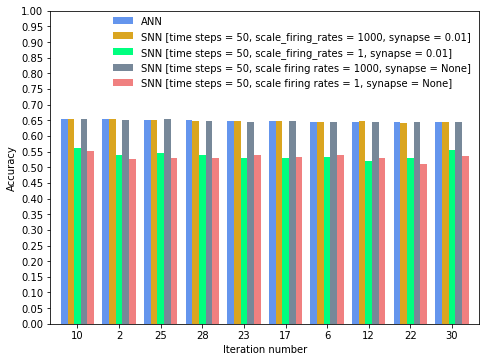

In [31]:
# create chart for accuracies per configuration of snn compared to ann
top_10_accs_df = accs_df.sort_values('ann_accuracy', ascending=False)[:10]
print(top_10_accs_df)
colors = ['CornflowerBlue', 'GoldenRod', 'SpringGreen', 'LightSlateGray', 'LightCoral',]
ax = top_10_accs_df.plot.bar(x='iterations', y=top_10_accs_df.columns[1:],
                        width=0.8, color=colors,  figsize=[6.4 * 1.2, 4.8 * 1.2])

plt.yticks(np.arange(0, 1.05, 0.05))
plt.xticks(rotation=0)
plt.ylabel('Accuracy')
plt.xlabel('Iteration number')

# rename legend labels
legend_labels = ['ANN']
for variant in snn_config:
    if variant['synapse'] == 'None':
        name = 'SNN [time steps = {}, scale firing rates = {}, synapse = None]'.format(
            variant['timesteps'], variant['scale_firing_rates']
        )
    else:
        name = 'SNN [time steps = {}, scale_firing_rates = {}, synapse = {:.2f}]'.format(
            variant['timesteps'], variant['scale_firing_rates'], variant['synapse']
        )

    legend_labels.append(name)

ax.legend(labels=legend_labels, loc='lower right', frameon=False, bbox_to_anchor=(0.99, 0.74),
          ncol=1, borderaxespad=0)
plt.savefig(acc_top_10_save_path_svg, bbox_inches='tight')
plt.savefig(acc_top_10_save_path_pdf, bbox_inches='tight')
plt.show()
